#### Experiment 3
- we test the accuracy 
- we then import baseline accuracies from experiment 1
- in the second part of experiment 3, we take a deeper look into the change under MTL 


##### Results

In [76]:
import os 
import pandas as pd

ITERATIONS = 5
columns=["dataset", "mtl", 'gamma', "accuracy", "precision", "recall", "duration", "highest val epoch", "best val accuracy"]
stl_results_fcn = pd.DataFrame(columns=columns)
stl_results_res = pd.DataFrame(columns=columns)

expl_type = "ig_norm"

for idx, dataset in enumerate(['GunPoint','Beef','ECG200']):#enumerate(os.listdir('./archives/ucr')):

    bac = 0; acc=0; precision=0; recall=0; duration=0

    for classifier in ['conv','ae', 'nn']: 

        for gamma in [0.25, 0.5,0.75]:

            stl_results_fcn_i = pd.DataFrame(columns=columns)
            stl_results_res_i = pd.DataFrame(columns=columns)

            for itr in range(ITERATIONS): 
                fcn_model = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/fcn/fcn_mt_{classifier}_{gamma}_{itr}/fcn_{expl_type}/df_best_model.csv')
                fcn_metrics = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/fcn/fcn_mt_{classifier}_{gamma}_{itr}/fcn_{expl_type}/task1_df_metrics.csv')
                fcn_hist = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/fcn/fcn_mt_{classifier}_{gamma}_{itr}/fcn_{expl_type}/history.csv')
                res_model = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/resnet/resnet_mt_{classifier}_{gamma}_{itr}/resnet_{expl_type}/df_best_model.csv')
                res_metrics = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/resnet/resnet_mt_{classifier}_{gamma}_{itr}/resnet_{expl_type}/task1_df_metrics.csv')
                res_hist = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/resnet/resnet_mt_{classifier}_{gamma}_{itr}/resnet_{expl_type}/history.csv')

                fcn_vals = [ fcn_metrics["accuracy"].values[0],fcn_metrics["precision"].values[0],
                            fcn_metrics["recall"].values[0], fcn_metrics["duration"].values[0],
                            list(fcn_hist["val_task_1_output_accuracy"]).index(max(fcn_hist["val_task_1_output_accuracy"])),
                            max(fcn_hist["val_task_1_output_accuracy"])]  
                res_vals = [res_metrics["accuracy"].values[0], res_metrics["precision"].values[0],
                            res_metrics["recall"].values[0], res_metrics["duration"].values[0],
                            list(res_hist["val_task_1_output_accuracy"]).index(max(res_hist["val_task_1_output_accuracy"])),
                            max(fcn_hist["val_task_1_output_accuracy"])]  
                #Read STL results for FCN classifier
                if itr == 0:
                    stl_results_fcn_i.loc[idx] = [dataset,classifier,gamma] + fcn_vals
                    stl_results_res_i.loc[idx] = [dataset,classifier,gamma] + res_vals
                else:
                    stl_results_fcn_i.loc[idx, columns[3:]] += fcn_vals
                    stl_results_res_i.loc[idx, columns[3:]] += res_vals

            stl_results_fcn_i.loc[idx, columns[3:]] /= ITERATIONS
            stl_results_res_i.loc[idx, columns[3:]] /= ITERATIONS

            stl_results_fcn = stl_results_fcn.append(stl_results_fcn_i)
            stl_results_res = stl_results_res.append(stl_results_res_i)




C:\Users\boent\AppData\Local\Temp\ipykernel_41572\3788036286.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stl_results_fcn = stl_results_fcn.append(stl_results_fcn_i)
C:\Users\boent\AppData\Local\Temp\ipykernel_41572\3788036286.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stl_results_res = stl_results_res.append(stl_results_res_i)
C:\Users\boent\AppData\Local\Temp\ipykernel_41572\3788036286.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stl_results_fcn = stl_results_fcn.append(stl_results_fcn_i)
C:\Users\boent\AppData\Local\Temp\ipykernel_41572\3788036286.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stl_resu

In [58]:
display(stl_results_fcn)

,dataset,mtl,gamma,accuracy,precision,recall,duration,highest val epoch,best val accuracy
0,GunPoint,conv,0.25,1.000000,1.000000,1.000000,84.791785,156,1.000000
0,GunPoint,conv,0.50,1.000000,1.000000,1.000000,69.238138,104,1.000000
0,GunPoint,conv,0.75,0.993333,0.993333,0.993421,65.902966,108,1.000000
0,GunPoint,ae,0.25,1.000000,1.000000,1.000000,98.912929,81,1.000000
0,GunPoint,ae,0.50,1.000000,1.000000,1.000000,78.538585,78,1.000000
0,GunPoint,ae,0.75,1.000000,1.000000,1.000000,75.695552,89,1.000000
0,GunPoint,nn,0.25,1.000000,1.000000,1.000000,95.433854,148,1.000000
0,GunPoint,nn,0.50,1.000000,1.000000,1.000000,92.565158,137,1.000000
0,GunPoint,nn,0.75,0.993333,0.993506,0.993243,93.699367,73,1.000000
1,Beef,conv,0.25,0.466667,0.563333,0.466667,63.701042,312,0.700000


In [77]:
display(stl_results_res)

,dataset,mtl,gamma,accuracy,precision,recall,duration,highest val epoch,best val accuracy
0,GunPoint,conv,0.25,0.990667,0.991009,0.990541,141.805320,82.6,1.000000
0,GunPoint,conv,0.50,0.992000,0.992241,0.991892,133.293223,64.0,1.000000
0,GunPoint,conv,0.75,0.985333,0.985946,0.985135,132.553177,125.4,1.000000
0,GunPoint,ae,0.25,0.993333,0.993573,0.993243,227.270331,66.4,1.000000
0,GunPoint,ae,0.50,0.992000,0.992274,0.991892,281.133657,78.0,1.000000
0,GunPoint,ae,0.75,0.990667,0.991074,0.990541,213.454865,89.2,1.000000
0,GunPoint,nn,0.25,0.992000,0.992241,0.991892,155.821857,72.8,1.000000
0,GunPoint,nn,0.50,0.990667,0.990976,0.990541,152.656338,74.0,1.000000
0,GunPoint,nn,0.75,0.988000,0.988477,0.987838,151.282457,85.4,1.000000
1,Beef,conv,0.25,0.693333,0.713659,0.693333,124.700820,304.2,0.713333


#### Compare Results with Experiment 1

In [79]:
results_experiment_1_fcn = pd.read_csv("results_csv/Experiment1a/test_results_classification_fcn.csv")
results_experiment_1_res = pd.read_csv("results_csv/Experiment1a/test_results_classification_resnet.csv")

#### fcn


In [80]:
merged_fcn_df = stl_results_fcn.merge(results_experiment_1_fcn,how='inner', on=['dataset'])
merged_fcn_df

,dataset,mtl,gamma,accuracy_x,precision_x,recall_x,duration_x,highest val epoch,best val accuracy,Unnamed: 0,accuracy_y,precision_y,recall_y,duration_y,epoch
0,GunPoint,conv,0.25,0.985333,0.986780,0.985171,77.780691,150.6,1.000000,0,0.990000,0.990506,0.989865,70.588227,133.0
1,GunPoint,conv,0.50,1.000000,1.000000,1.000000,74.600688,125.8,1.000000,0,0.990000,0.990506,0.989865,70.588227,133.0
2,GunPoint,conv,0.75,0.996000,0.996103,0.995982,74.105635,120.8,1.000000,0,0.990000,0.990506,0.989865,70.588227,133.0
3,GunPoint,ae,0.25,0.992000,0.992436,0.991892,89.755652,130.2,1.000000,0,0.990000,0.990506,0.989865,70.588227,133.0
4,GunPoint,ae,0.50,0.997333,0.997436,0.997297,86.288507,109.0,1.000000,0,0.990000,0.990506,0.989865,70.588227,133.0
5,GunPoint,ae,0.75,0.993333,0.993701,0.993243,85.613873,91.4,1.000000,0,0.990000,0.990506,0.989865,70.588227,133.0
6,GunPoint,nn,0.25,1.000000,1.000000,1.000000,93.233401,111.0,1.000000,0,0.990000,0.990506,0.989865,70.588227,133.0
7,GunPoint,nn,0.50,0.998667,0.998701,0.998649,90.860608,152.0,1.000000,0,0.990000,0.990506,0.989865,70.588227,133.0
8,GunPoint,nn,0.75,0.992000,0.992340,0.991892,90.338150,105.0,1.000000,0,0.990000,0.990506,0.989865,70.588227,133.0
9,Beef,conv,0.25,0.546667,0.580614,0.546667,59.695339,372.8,0.713333,1,0.566667,0.657516,0.566667,55.761553,315.5


In [104]:
columns_to_drop = ["duration_x", "duration_y", "highest val epoch", "epoch", "Unnamed: 0","best val accuracy"] #"precision_x","recall_x","precision_y","recall_y",
df_dropped_fcn = merged_fcn_df.drop(columns=columns_to_drop)

new_column_names = {"mtl":"module","accuracy_x" : "exp3:acc","duration_x":"exp3:duration","highest val epoch":"epoch","accuracy_y":"exp1:acc", "duration_y":"exp3:duration"}
df_dropped_fcn.rename(columns=new_column_names, inplace=True)

df_dropped_fcn.to_csv("results_csv/Experiment2/test_results_classification_fcn.csv")
df_dropped_fcn.to_latex("results_csv/Experiment2/test_results_classification_fcn.tex")

df_dropped_fcn

C:\Users\boent\AppData\Local\Temp\ipykernel_41572\4163229565.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_dropped_fcn.to_latex("results_csv/Experiment2/test_results_classification_fcn.tex")


,dataset,module,gamma,exp3:acc,precision_x,recall_x,exp1:acc,precision_y,recall_y
0,GunPoint,conv,0.25,0.985333,0.986780,0.985171,0.990000,0.990506,0.989865
1,GunPoint,conv,0.50,1.000000,1.000000,1.000000,0.990000,0.990506,0.989865
2,GunPoint,conv,0.75,0.996000,0.996103,0.995982,0.990000,0.990506,0.989865
3,GunPoint,ae,0.25,0.992000,0.992436,0.991892,0.990000,0.990506,0.989865
4,GunPoint,ae,0.50,0.997333,0.997436,0.997297,0.990000,0.990506,0.989865
5,GunPoint,ae,0.75,0.993333,0.993701,0.993243,0.990000,0.990506,0.989865
6,GunPoint,nn,0.25,1.000000,1.000000,1.000000,0.990000,0.990506,0.989865
7,GunPoint,nn,0.50,0.998667,0.998701,0.998649,0.990000,0.990506,0.989865
8,GunPoint,nn,0.75,0.992000,0.992340,0.991892,0.990000,0.990506,0.989865
9,Beef,conv,0.25,0.546667,0.580614,0.546667,0.566667,0.657516,0.566667


In [110]:
# check how often results in mtl are better
def compare_rows(row1, row2):
    return row1.where(row1 >= row2)


accuracy_mtl = df_dropped_fcn["exp3:acc"]
accuracy_stl = df_dropped_fcn["exp1:acc"]

# nan values show better results in stl 
better_stl = compare_rows(accuracy_mtl,accuracy_stl).isna().sum()

print(len(df_dropped_fcn)-better_stl)

20


#### resnet

In [81]:
merged_res_df = stl_results_res.merge(results_experiment_1_res,how='inner', on=['dataset'])
merged_res_df

,dataset,mtl,gamma,accuracy_x,precision_x,recall_x,duration_x,highest val epoch,best val accuracy,Unnamed: 0,accuracy_y,precision_y,recall_y,duration_y,epoch
0,GunPoint,conv,0.25,0.990667,0.991009,0.990541,141.805320,82.6,1.000000,0,0.993333,0.993590,0.993243,299.928772,60.5
1,GunPoint,conv,0.50,0.992000,0.992241,0.991892,133.293223,64.0,1.000000,0,0.993333,0.993590,0.993243,299.928772,60.5
2,GunPoint,conv,0.75,0.985333,0.985946,0.985135,132.553177,125.4,1.000000,0,0.993333,0.993590,0.993243,299.928772,60.5
3,GunPoint,ae,0.25,0.993333,0.993573,0.993243,227.270331,66.4,1.000000,0,0.993333,0.993590,0.993243,299.928772,60.5
4,GunPoint,ae,0.50,0.992000,0.992274,0.991892,281.133657,78.0,1.000000,0,0.993333,0.993590,0.993243,299.928772,60.5
5,GunPoint,ae,0.75,0.990667,0.991074,0.990541,213.454865,89.2,1.000000,0,0.993333,0.993590,0.993243,299.928772,60.5
6,GunPoint,nn,0.25,0.992000,0.992241,0.991892,155.821857,72.8,1.000000,0,0.993333,0.993590,0.993243,299.928772,60.5
7,GunPoint,nn,0.50,0.990667,0.990976,0.990541,152.656338,74.0,1.000000,0,0.993333,0.993590,0.993243,299.928772,60.5
8,GunPoint,nn,0.75,0.988000,0.988477,0.987838,151.282457,85.4,1.000000,0,0.993333,0.993590,0.993243,299.928772,60.5
9,Beef,conv,0.25,0.693333,0.713659,0.693333,124.700820,304.2,0.713333,1,0.766667,0.830974,0.766667,243.381377,426.0


In [113]:
columns_to_drop =  ["duration_x", "duration_y", "highest val epoch", "epoch", "Unnamed: 0","best val accuracy"] #"precision_x","recall_x","precision_y","recall_y",#["precision_x","recall_x","precision_y","recall_y","Unnamed: 0","best val accuracy"]
df_dropped_res = merged_res_df.drop(columns=columns_to_drop)

new_column_names = {"mtl":"module","accuracy_x" : "exp3:acc","duration_x":"exp3:duration","highest val epoch":"epoch","accuracy_y":"exp1:acc", "duration_y":"exp3:duration"}
df_dropped_res.rename(columns=new_column_names, inplace=True)

df_dropped_res.to_csv("results_csv/Experiment2/test_results_classification_resnet.csv")
df_dropped_res.to_latex("results_csv/Experiment2/test_results_classification_resnet.tex")
df_dropped_res

C:\Users\boent\AppData\Local\Temp\ipykernel_41572\1433790845.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_dropped_res.to_latex("results_csv/Experiment2/test_results_classification_resnet.tex")


,dataset,module,gamma,exp3:acc,precision_x,recall_x,exp1:acc,precision_y,recall_y
0,GunPoint,conv,0.25,0.990667,0.991009,0.990541,0.993333,0.993590,0.993243
1,GunPoint,conv,0.50,0.992000,0.992241,0.991892,0.993333,0.993590,0.993243
2,GunPoint,conv,0.75,0.985333,0.985946,0.985135,0.993333,0.993590,0.993243
3,GunPoint,ae,0.25,0.993333,0.993573,0.993243,0.993333,0.993590,0.993243
4,GunPoint,ae,0.50,0.992000,0.992274,0.991892,0.993333,0.993590,0.993243
5,GunPoint,ae,0.75,0.990667,0.991074,0.990541,0.993333,0.993590,0.993243
6,GunPoint,nn,0.25,0.992000,0.992241,0.991892,0.993333,0.993590,0.993243
7,GunPoint,nn,0.50,0.990667,0.990976,0.990541,0.993333,0.993590,0.993243
8,GunPoint,nn,0.75,0.988000,0.988477,0.987838,0.993333,0.993590,0.993243
9,Beef,conv,0.25,0.693333,0.713659,0.693333,0.766667,0.830974,0.766667


In [114]:
# check how often results in mtl are better
def compare_rows(row1, row2):
    return row1.where(row1 >= row2)


accuracy_mtl = df_dropped_res["exp3:acc"]
accuracy_stl = df_dropped_res["exp1:acc"]

# nan values show better results in stl 
better_stl = compare_rows(accuracy_mtl,accuracy_stl).isna().sum()

print(len(df_dropped_res)-better_stl)

8


### Calculate Custom Metrics for Attribution Method

- we calculate the mean Pearson Correlation Cofficient 
- we calculate the mean MSE

for: Prediction and Label, Prediction and current feature attribution, current feature attribution and label

In [213]:
import tensorflow_addons as tfa
from utils.explanations import integrated_gradients
from keras.utils import CustomObjectScope
import tensorflow.keras as keras
import tensorflow as tf
import os
from utils.explanations import minmax_norm
from utils.explanations import calculate_ig_attributions, calculate_cam_attributions
from sklearn.metrics import mean_absolute_error, mean_squared_error
from utils.utils import read_dataset
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd

root_dir = 'G:/Meine Ablage/master thesis/code/xai-tsc'

# Load model to calculate custom metrics 
def load_model(root_dir, archive_name, dataset_name, classifier, data_source): 
    with CustomObjectScope({'InstanceNormalization':tfa.layers.InstanceNormalization()}):
        model_path = f'{root_dir}/results/{archive_name}/{dataset_name}/' \
                                                + f'{classifier.split("_")[0]}/{classifier}/{data_source}/' \
                                                + f'best_model.hdf5'
        model =keras.models.load_model(model_path ,compile=False)
        return model
    

def norm(values): 
    if not type(values) == np.ndarray:
        return normalize(values.numpy().reshape(1,-1))[0]
    else: 
        return normalize(values.reshape(1,-1))[0]


    
#store custom metrics for model

# Loop over data

archive = 'ucr'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'

def calculate_metrics(gamma=0.5, expl_type='ig', form = 'norm'): 

    ITERATIONS = 5

    columns = ["dataset","model", "gamma", "pm1", "pm2", "pm3", "mm1", "mm2", "mm3"]
    models_train =  pd.DataFrame(columns=columns)
    models_test = pd.DataFrame(columns=columns)


    position = 0

    for idx, dataset in enumerate(['GunPoint','Beef', 'ECG200']):# ,]):#'GunPoint','Beef', 'ECG200'

        print(dataset)
        ylen = 1
        #Just for now:

        data = read_dataset(data_p, archive, dataset, 'original', ylen)[dataset]
        #assertion,each ts has same length
        ylen = len(data[0][0])

        for gamma in [0.25,0.5,0.75]:

            #fcn_mt_ae','fcn_mt_conv','resnet_mt_ae','resnet_mt_conv'
            for model in ['fcn_mt_ae']:#'fcn_mt_conv','fcn_mt_nn','resnet_mt_ae','resnet_mt_conv','resnet_mt_nn']: #'fcn_mt_linear']: #['fcn_mt_ae','fcn_mt_conv', 'fcn_mt_linear']: 
                model_type = model.split('_')[0] 


                for itr in range(ITERATIONS): 
                    if expl_type == 'ig': 
                        data_stl  = read_dataset(root_dir, archive, dataset, f'{model_type}_ig_{form}', ylen)[dataset]
                        #Load required models
                        #best epoch by val loss output_2:
                        hist = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/{model_type}/{model}_{gamma}_{itr}/{model_type}_ig_{form}/history.csv')  
                        
                        #min_val_loss_output_2 = list(hist["task_2_output_loss"]).index(min(hist["task_2_output_loss"]))
                        #best_val_acc = list(hist["val_task_1_output_accuracy"]).index(max(hist["val_task_1_output_accuracy"]))
                        link = f'./results/ucr/{dataset}/experiment_2/{model_type}/{model}_{gamma}_{itr}/{model_type}_ig_{form}/best_model.hdf5'
                        loaded_model = keras.models.load_model(link ,compile=False)
                        #Calculate attributions 
                        attributions = calculate_ig_attributions(root_dir, archive, f"{model}_{gamma}_{itr}", dataset, f"{model_type}_ig_{form}", task=1, experiment=2)
                    elif expl_type == 'cam': 
                        data_stl  = read_dataset(root_dir, archive, dataset, f'{model_type}_cam_{form}', ylen)[dataset]
                        #Load required models
                        hist = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/{model_type}/{model}_{gamma}_{itr}/{model_type}_cam_{form}/history.csv')  
                        #min_val_loss_output_2 = list(hist["task_2_output_loss"]).index(min(hist["task_2_output_loss"]))
                        #best_val_acc = list(hist["val_task_1_output_accuracy"]).index(max(hist["val_task_1_output_accuracy"]))
                        link = f'./results/ucr/{dataset}/experiment_2/{model_type}/{model}_{gamma}_{itr}/{model_type}_cam_{form}/best_model.hdf5'
                        loaded_model = keras.models.load_model(link ,compile=False)
                        attributions = calculate_cam_attributions(root_dir, archive, f"{model}_{gamma}_{itr}", dataset, f"{model_type}_cam_{form}", experiment=2)

                    for t in [1,3]:
                        
                        tc = t 
                        #Pearson and mse [p,m]
                        pm1 = 0; pm2 = 0; pm3 = 0; pm4 = 0;  mm1 = 0; mm2 = 0; mm3 = 0; mm4 = 0
                        #predict values for all timeseries 
                        print("pred", t, data[t-1].shape)

                        pred = loaded_model.predict(data[t-1])
                        #run loop
                        for ts in range(len(data[t])):                
                            #small workaround
                            #structure of attributions 0 --> train 1 --> test set
                            pm1 += np.corrcoef(pred[1][ts].flatten(),data_stl[t][ts])[0,1]
                            pm2 += np.corrcoef(pred[1][ts].flatten(),attributions[0 if t == 1 else 1][ts][2])[0,1]
                            pm3 += np.corrcoef(data_stl[t][ts],attributions[0 if t == 1 else 1][ts][2])[0,1]
                            #pm4 += np.corrcoef(pred[1][ts].flatten(),ig_attributions_t2[0 if t == 1 else 1][ts][2])[0,1]
                            mm1 += mean_squared_error(pred[1][ts].flatten(),data_stl[t][ts])
                            mm2 += mean_squared_error(pred[1][ts].flatten(),attributions[0 if t == 1 else 1][ts][2])
                            mm3 += mean_squared_error(data_stl[t][ts],attributions[0 if t == 1 else 1][ts][2])
                            #mm4 += mean_squared_error(pred[1][ts].flatten(),ig_attributions_t2[0 if t == 1 else 1][ts][2])
                        #Init for model 
                        l = len(data[t])

                        if itr == 0:

                            if t == 1: 
                                #f'{dataset}_{model.split("_")[-1]}'
                                models_train.loc[position] = [dataset, model, gamma, pm1/l, pm2/l,pm3/l,mm1/l,mm2/l,mm3/l]
                                                                                  #  "mm1":mm1/l, "mm2": mm2/l, "mm3": mm3/l} # "mm4": mm4/l
                            else: 
                                models_test.loc[position] = [dataset, model, gamma, pm1/l, pm2/l,pm3/l,mm1/l,mm2/l,mm3/l]
                                #{"exp": expl_type, "model" : model, "gamma" : gamma, "pm1":pm1/l,"pm2": pm2/l,"pm3": pm3/l,
                                #                                                    "mm1":mm1/l, "mm2": mm2/l, "mm3": mm3/l}#"mm4": mm4/l
                            
                        else:
                            if t == 1: 
                                models_train.loc[position, columns[3:]] += [ pm1/l, pm2/l,pm3/l,mm1/l,mm2/l,mm3/l]
                            
                            else:                                                      
                                models_test.loc[position, columns[3:]] +=[ pm1/l, pm2/l,pm3/l,mm1/l,mm2/l,mm3/l]
                                #["pm1":pm1/l,"pm2": pm2/l,"pm3": pm3/l,"pm4": pm4/l,"mm1":mm1/l, "mm2": mm2/l, "mm3": mm3/l]

                models_train.loc[position, columns[3:]] /= ITERATIONS
                models_test.loc[position, columns[3:]] /= ITERATIONS
                        
                position += 1

            position += 1

        position += 1


    return models_train, models_test

train_data, test_data = calculate_metrics()

GunPoint
G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/GunPoint//experiment_2/fcn/fcn_mt_ae_0.25_0/fcn_ig_norm/best_model.hdf5
5/5 [==============================] - 0s 44ms/step
pred 1 (50, 150)
2/2 [==============================] - 1s 35ms/step
pred 3 (150, 150)
5/5 [==============================] - 0s 38ms/step
G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/GunPoint//experiment_2/fcn/fcn_mt_ae_0.25_1/fcn_ig_norm/best_model.hdf5
5/5 [==============================] - 0s 40ms/step
pred 1 (50, 150)
2/2 [==============================] - 1s 26ms/step
pred 3 (150, 150)
5/5 [==============================] - 0s 37ms/step
G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/GunPoint//experiment_2/fcn/fcn_mt_ae_0.25_2/fcn_ig_norm/best_model.hdf5
5/5 [==============================] - 0s 39ms/step
pred 1 (50, 150)
2/2 [==============================] - 1s 22ms/step
pred 3 (150, 150)
5/5 [==============================] - 0s 40ms/step
G:/Meine Ablage/master thesis/code/xa

In [175]:
#train_data.to_csv("./results_csv/train_data_5runs.csv")
#test_data.to_csv("./results_csv/test_data_5runs.csv")

##### with missing  fcn_ae

In [254]:
train_data = pd.read_csv("./results_csv/Experiment2/train_data_5runs_rw.csv")
test_data = pd.read_csv("./results_csv/Experiment2/test_data_5runs_rw.csv")
#new.to_csv("./results_csv/Experiment2/train_data_5runs_rw.csv")

In [176]:
test_data

test_data["merge_column"] = test_data["dataset"] + "_" + test_data["model"]

In [177]:
experiment_1 = pd.read_csv("results_csv/Experiment1c/test_results_fcn.csv")
experiment_1


,Unnamed: 0,model,expl_type,pm1,mm1
0,GunPoint_resnet_mt_conv,resnet_mt_conv,ig_norm,0.862019,0.001814
1,GunPoint_resnet_mt_ae,resnet_mt_ae,ig_norm,0.881113,0.001463
2,GunPoint_resnet_mt_nn,resnet_mt_nn,ig_norm,0.584995,0.004028
3,Beef_resnet_mt_conv,resnet_mt_conv,ig_norm,0.258038,0.002213
4,Beef_resnet_mt_ae,resnet_mt_ae,ig_norm,0.378816,0.002242
5,Beef_resnet_mt_nn,resnet_mt_nn,ig_norm,0.391474,0.001805
6,ECG200_resnet_mt_conv,resnet_mt_conv,ig_norm,0.622550,0.007841
7,ECG200_resnet_mt_ae,resnet_mt_ae,ig_norm,0.632296,0.007161
8,ECG200_resnet_mt_nn,resnet_mt_nn,ig_norm,0.582786,0.006345


In [255]:
train_data

,Unnamed: 0,dataset,model,gamma,pm1,pm2,pm3,mm1,mm2,mm3
0,7,Beef,fcn_mt_ae,0.25,0.621873,0.429166,0.680836,0.001282,0.000895,0.001543
1,9,Beef,fcn_mt_ae,0.50,0.608485,0.281559,0.459573,0.001340,0.000882,0.001860
2,11,Beef,fcn_mt_ae,0.75,0.655638,0.483735,0.711202,0.001197,0.000764,0.001431
3,15,Beef,fcn_mt_conv,0.25,0.194374,0.120071,0.528747,0.003023,0.001721,0.001717
4,20,Beef,fcn_mt_conv,0.50,0.149346,0.047120,0.451653,0.003079,0.001649,0.001858
5,25,Beef,fcn_mt_conv,0.75,0.150179,0.051858,0.417802,0.002733,0.001407,0.001997
6,16,Beef,fcn_mt_nn,0.25,0.408940,0.242618,0.704364,0.001573,0.000632,0.001515
7,21,Beef,fcn_mt_nn,0.50,0.406787,0.253142,0.542533,0.001583,0.000700,0.001701
8,26,Beef,fcn_mt_nn,0.75,0.376419,0.203928,0.557928,0.001702,0.000436,0.001748
9,17,Beef,resnet_mt_ae,0.25,0.838577,0.492436,0.556003,0.000658,0.002553,0.002524


In [257]:
test_data


,Unnamed: 0,dataset,model,gamma,pm1,pm2,pm3,mm1,mm2,mm3
0,7,Beef,fcn_mt_ae,0.25,0.473143,0.305072,0.479503,0.001675,0.000973,0.001903
1,9,Beef,fcn_mt_ae,0.50,0.471745,0.211157,0.310937,0.001661,0.000853,0.002075
2,11,Beef,fcn_mt_ae,0.75,0.494015,0.316711,0.552637,0.001617,0.000901,0.001679
3,15,Beef,fcn_mt_conv,0.25,0.216409,0.127192,0.380156,0.002976,0.001757,0.001973
4,20,Beef,fcn_mt_conv,0.50,0.164253,0.011257,0.277892,0.003043,0.001710,0.002119
5,25,Beef,fcn_mt_conv,0.75,0.175425,0.034748,0.232314,0.002677,0.001434,0.002333
6,16,Beef,fcn_mt_nn,0.25,0.417817,0.263611,0.551981,0.001714,0.000578,0.001747
7,21,Beef,fcn_mt_nn,0.50,0.409088,0.247525,0.447810,0.001744,0.000643,0.001867
8,26,Beef,fcn_mt_nn,0.75,0.401224,0.140042,0.341273,0.001750,0.000457,0.002062
9,17,Beef,resnet_mt_ae,0.25,0.346427,0.190593,0.418036,0.002300,0.003993,0.003327


#### Similarities between 

0.8825396587182892
0.926157369509795
0.9557243198749233
0.9283553275219717
0.7482561254889424
0.49242779209712934


Text(0.5, 1.0, 'Feature attribution and labeled data in test data')

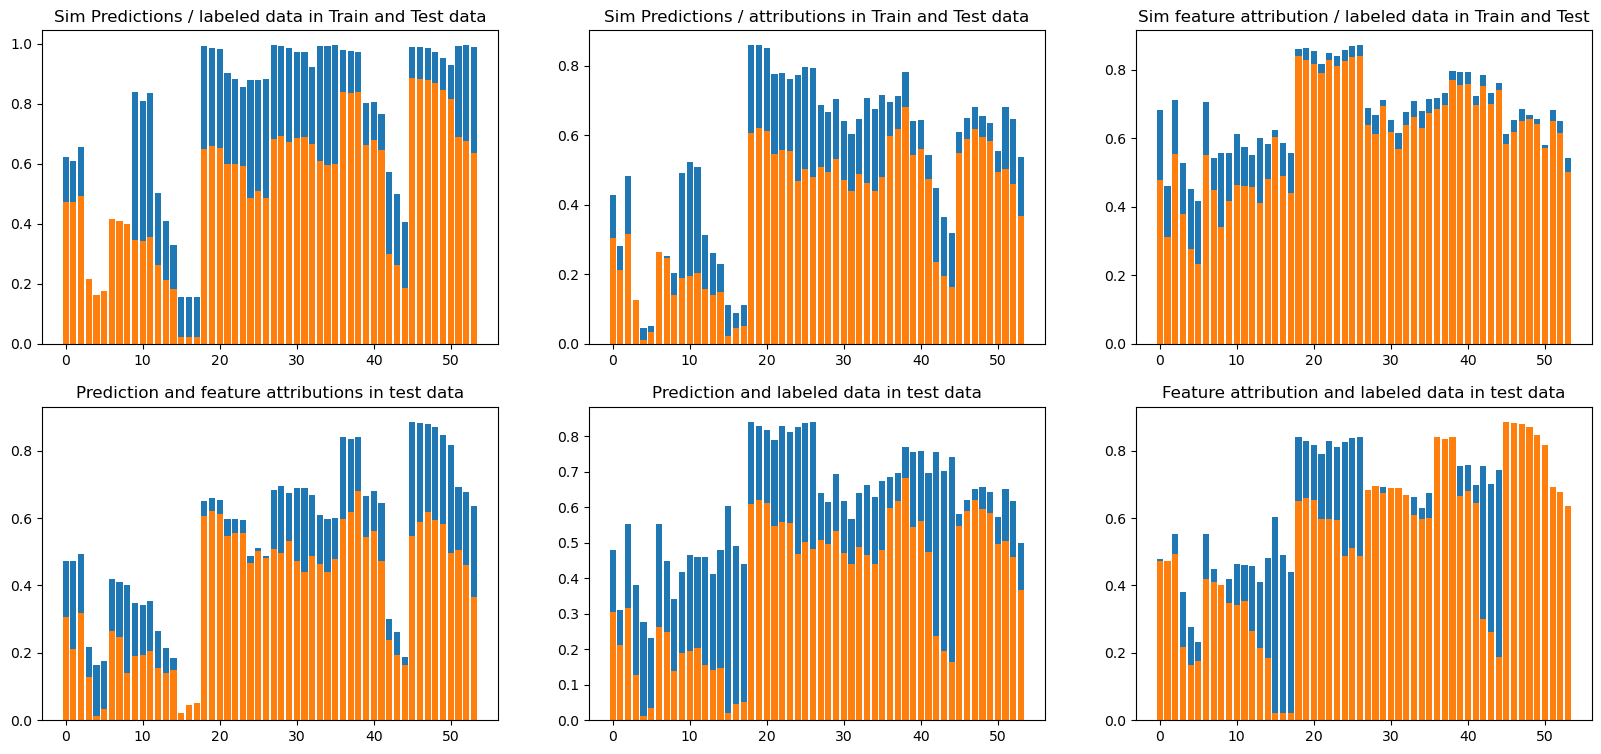

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [278]:
%matplotlib inline
import matplotlib.pyplot as plt
np.corrcoef(train_data["pm1"],test_data["pm1"])

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 5))

plt.subplots_adjust(bottom=-0.5)

plt.figure()
print(np.corrcoef(train_data["pm1"],test_data["pm1"])[0,1])
axes[0][0].bar(np.arange(len(train_data["pm1"])), train_data["pm1"])
axes[0][0].bar(np.arange(len(test_data["pm1"])), test_data["pm1"])
axes[0][0].set_title("Sim Predictions / labeled data in Train and Test data")

print(np.corrcoef(train_data["pm2"],test_data["pm2"])[0,1])
axes[0][1].bar(np.arange(len(train_data["pm2"])), train_data["pm2"])
axes[0][1].bar(np.arange(len(test_data["pm2"])), test_data["pm2"])
axes[0][1].set_title("Sim Predictions / attributions in Train and Test data")

print(np.corrcoef(train_data["pm3"],test_data["pm3"])[0,1])
axes[0][2].bar(np.arange(len(train_data["pm3"])), train_data["pm3"])
axes[0][2].bar(np.arange(len(test_data["pm3"])), test_data["pm3"])
axes[0][2].set_title("Sim feature attribution / labeled data in Train and Test")


print(np.corrcoef(test_data["pm1"],test_data["pm2"])[0,1])
axes[1][0].bar(np.arange(len(train_data["pm1"])), test_data["pm1"])
axes[1][0].bar(np.arange(len(test_data["pm2"])), test_data["pm2"])
axes[1][0].set_title("Prediction and feature attributions in test data")


print(np.corrcoef(test_data["pm2"],test_data["pm3"])[0,1])
axes[1][1].bar(np.arange(len(test_data["pm3"])), test_data["pm3"])
axes[1][1].bar(np.arange(len(test_data["pm2"])), test_data["pm2"])
axes[1][1].set_title("Prediction and labeled data in test data")

plt.figure()
print(np.corrcoef(test_data["pm1"],test_data["pm3"])[0,1])
axes[1][2].bar(np.arange(len(test_data["pm3"])), test_data["pm3"])
axes[1][2].bar(np.arange(len(test_data["pm1"])), test_data["pm1"])
axes[1][2].set_title("Feature attribution and labeled data in test data")

In [286]:
experiment2 = test_data

experiment2["merge_column"] = experiment2["dataset"] + "_" + experiment2["model"]

experiment1_fcn = pd.read_csv("results_csv/Experiment1c/test_results_fcn.csv")
experiment1_res = pd.read_csv("results_csv/Experiment1c/test_results_resnet.csv")

experiment1_merged = (pd.concat([experiment1_fcn , experiment1_res]))


#display(experiment2) 

merged_df = experiment2.merge(experiment1_merged,how='inner', left_on='merge_column', right_on='Unnamed: 0')
#merged_df = merged_df.merge(experiment1_res,how='left', left_on='merge_column', right_on='Unnamed: 0')


to_drop = ["merge_column","Unnamed: 0_y","model_y","expl_type"]

merged_df = merged_df.drop(columns=to_drop)
#merged_df = merged_df.drop(columns=to_drop)
"""
merged_df['pm1'] = merged_df['pm1_x'] - merged_df['pm1_y']
sum(merged_df['pm1'])/len(merged_df['pm1'])
# Drop the redundant columns
##result = merged_df.drop(columns=['A_x', 'A_y']))
filtered_df = merged_df[merged_df['Unnamed: 0'].str.contains('GunPoint')]
print(sum(filtered_df["pm1"]/len(filtered_df)))

filtered_df = merged_df[merged_df['Unnamed: 0'].str.contains('Beef')]
print(sum(filtered_df["pm1"]/len(filtered_df)))

filtered_df = merged_df[merged_df['Unnamed: 0'].str.contains('ECG200')]
print(sum(filtered_df["pm1"]/len(filtered_df)))

"""
display(merged_df)


accuracy_mtl = merged_df["pm1_x"]
accuracy_stl = merged_df["pm1_y"]

# nan values show better results in stl 
better_stl = compare_rows(accuracy_mtl,accuracy_stl).isna().sum()

print(len(merged_df)-better_stl, len(merged_df), len(merged_df)-better_stl/len(merged_df))


,Unnamed: 0_x,dataset,model_x,gamma,pm1_x,pm2,pm3,mm1_x,mm2,mm3,pm1_y,mm1_y
0,7,Beef,fcn_mt_ae,0.25,0.473143,0.305072,0.479503,0.001675,0.000973,0.001903,0.514780,0.001561
1,9,Beef,fcn_mt_ae,0.50,0.471745,0.211157,0.310937,0.001661,0.000853,0.002075,0.514780,0.001561
2,11,Beef,fcn_mt_ae,0.75,0.494015,0.316711,0.552637,0.001617,0.000901,0.001679,0.514780,0.001561
3,15,Beef,fcn_mt_conv,0.25,0.216409,0.127192,0.380156,0.002976,0.001757,0.001973,0.423241,0.001734
4,20,Beef,fcn_mt_conv,0.50,0.164253,0.011257,0.277892,0.003043,0.001710,0.002119,0.423241,0.001734
5,25,Beef,fcn_mt_conv,0.75,0.175425,0.034748,0.232314,0.002677,0.001434,0.002333,0.423241,0.001734
6,16,Beef,fcn_mt_nn,0.25,0.417817,0.263611,0.551981,0.001714,0.000578,0.001747,0.598695,0.001393
7,21,Beef,fcn_mt_nn,0.50,0.409088,0.247525,0.447810,0.001744,0.000643,0.001867,0.598695,0.001393
8,26,Beef,fcn_mt_nn,0.75,0.401224,0.140042,0.341273,0.001750,0.000457,0.002062,0.598695,0.001393
9,17,Beef,resnet_mt_ae,0.25,0.346427,0.190593,0.418036,0.002300,0.003993,0.003327,0.378816,0.002242


28 54 53.51851851851852


#### MTL vs STL in pearson and MSE



#### M1

In [303]:
accuracy_mtl = merged_df["pm1_x"]
accuracy_stl = merged_df["pm1_y"]

# nan values show better results in stl 
better_stl = compare_rows(accuracy_mtl,accuracy_stl).isna().sum()

print(len(merged_df)-better_stl, len(merged_df), (len(merged_df)-better_stl)/len(merged_df))

accuracy_mtl = merged_df["mm1_x"]
accuracy_stl = merged_df["mm1_y"]

# nan values show better results in stl 
better_stl = compare_rows(accuracy_mtl,accuracy_stl).isna().sum()

print(len(merged_df)-better_stl, len(merged_df), (len(merged_df)-better_stl)/len(merged_df))

# fcn 
fcn_merged_df = merged_df[merged_df['model_x'].str.contains('fcn')]

accuracy_mtl = fcn_merged_df["pm1_x"]
accuracy_stl = fcn_merged_df["pm1_y"]
better_stl = compare_rows(accuracy_mtl,accuracy_stl).isna().sum()
print("For FCN", len(fcn_merged_df)-better_stl, len(fcn_merged_df), (len(fcn_merged_df)-better_stl)/len(fcn_merged_df))
# resnet

resnet_merged_df = merged_df[merged_df['model_x'].str.contains('resnet')]

accuracy_mtl = resnet_merged_df["pm1_x"]
accuracy_stl = resnet_merged_df["pm1_y"]
better_stl = compare_rows(accuracy_mtl,accuracy_stl).isna().sum()
print("For Resnet", len(resnet_merged_df )-better_stl, len(resnet_merged_df ), (len(resnet_merged_df )-better_stl)/len(resnet_merged_df))


dataset_merged_df = merged_df[merged_df['dataset'].str.contains('GunPoint')]

accuracy_mtl = dataset_merged_df["pm1_x"]
accuracy_stl = dataset_merged_df["pm1_y"]
better_stl = compare_rows(accuracy_mtl,accuracy_stl).isna().sum()
print("For GunPoint", len(dataset_merged_df)-better_stl, len(dataset_merged_df), (len(dataset_merged_df)-better_stl)/len(dataset_merged_df))


dataset_merged_df = merged_df[merged_df['dataset'].str.contains('Beef')]

accuracy_mtl = dataset_merged_df["pm1_x"]
accuracy_stl = dataset_merged_df["pm1_y"]
better_stl = compare_rows(accuracy_mtl,accuracy_stl).isna().sum()
print("For Beef", len(dataset_merged_df)-better_stl, len(dataset_merged_df), (len(dataset_merged_df)-better_stl)/len(dataset_merged_df))

dataset_merged_df = merged_df[merged_df['dataset'].str.contains('ECG200')]

accuracy_mtl = dataset_merged_df["pm1_x"]
accuracy_stl = dataset_merged_df["pm1_y"]
better_stl = compare_rows(accuracy_mtl,accuracy_stl).isna().sum()
print("For ECG200", len(dataset_merged_df)-better_stl, len(dataset_merged_df), (len(dataset_merged_df)-better_stl)/len(dataset_merged_df))


# ae
dataset_merged_df = merged_df[merged_df['model_x'].str.contains('ae')]

accuracy_mtl = dataset_merged_df["pm1_x"]
accuracy_stl = dataset_merged_df["pm1_y"]
better_stl = compare_rows(accuracy_mtl,accuracy_stl).isna().sum()
print("For AE", len(dataset_merged_df)-better_stl, len(dataset_merged_df), (len(dataset_merged_df)-better_stl)/len(dataset_merged_df))


# nn
dataset_merged_df = merged_df[merged_df['model_x'].str.contains('nn')]

accuracy_mtl = dataset_merged_df["pm1_x"]
accuracy_stl = dataset_merged_df["pm1_y"]
better_stl = compare_rows(accuracy_mtl,accuracy_stl).isna().sum()
print("For NN", len(dataset_merged_df)-better_stl, len(dataset_merged_df), (len(dataset_merged_df)-better_stl)/len(dataset_merged_df))

# conv
dataset_merged_df = merged_df[merged_df['model_x'].str.contains('conv')]

accuracy_mtl = dataset_merged_df["pm1_x"]
accuracy_stl = dataset_merged_df["pm1_y"]
better_stl = compare_rows(accuracy_mtl,accuracy_stl).isna().sum()
print("For Conv", len(dataset_merged_df)-better_stl, len(dataset_merged_df), (len(dataset_merged_df)-better_stl)/len(dataset_merged_df))



28 54 0.5185185185185185
28 54 0.5185185185185185
For FCN 12 27 0.4444444444444444
For Resnet 16 27 0.5925925925925926
For GunPoint 9 18 0.5
For Beef 1 18 0.05555555555555555
For ECG200 18 18 1.0
For AE 11 18 0.6111111111111112
For NN 9 18 0.5
For Conv 8 18 0.4444444444444444


#### M2

In [314]:
print("Mean M2", merged_df["pm2"].mean())
print("Mean M2 MA", merged_df[merged_df['model_x'].str.contains('ae')]["pm2"].mean())
print("Mean M2 FCN", merged_df[merged_df['model_x'].str.contains('fcn')]["pm2"].mean())
print("Mean M2 nn", merged_df[merged_df['model_x'].str.contains('nn')]["pm2"].mean())
print("Mean M2 GunPoint", merged_df[merged_df['dataset'].str.contains('GunPoint')]["pm2"].mean())
print("Max  M2 GunPoint", merged_df[merged_df['dataset'].str.contains('GunPoint')]["pm2"].max())
print("Mean M2 ECG200", merged_df[merged_df['dataset'].str.contains('ECG200')]["pm2"].mean())
print("Max  M2 ECG200", merged_df[merged_df['dataset'].str.contains('ECG200')]["pm2"].max())
print("Mean M2 Beef", merged_df[merged_df['dataset'].str.contains('Beef')]["pm2"].mean())
print("Max M2 Beef", merged_df[merged_df['dataset'].str.contains('Beef')]["pm2"].max())

Mean M2 0.3870017004035918
Mean M2 MA 0.4692648672873192
Mean M2 FCN 0.39524616470367274
Mean M2 FCN 0.3071579128851607
Mean M2 GunPoint 0.4902925596335213
Max  M2 GunPoint 0.6811737260424302
Mean M2 ECG200 0.5145708544172592
Max  M2 ECG200 0.6207157244938081
Mean M2 Beef 0.15614168715999424
Max M2 Beef 0.3167108594200627


In [12]:
pd.DataFrame(models_test).T

,exp,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,epoch_task_1,epoch_task_2
GunPoint_fcn_mt_ae_0.5,ig,fcn_mt_ae,0.5,0.834004,0.713088,0.79174,0.0,0.001862,0.003697,0.004923,78,399
GunPoint_fcn_mt_conv_0.5,ig,fcn_mt_conv,0.5,0.642387,0.505301,0.714599,0.0,0.004204,0.003536,0.005271,104,292
GunPoint_fcn_mt_nn_0.5,ig,fcn_mt_nn,0.5,0.48946,0.342776,0.653584,0.0,0.004929,0.002874,0.00519,93,397
GunPoint_resnet_mt_ae_0.5,ig,resnet_mt_ae,0.5,0.883213,0.279676,0.271944,0.0,0.001423,0.006772,0.007578,69,1164
GunPoint_resnet_mt_conv_0.5,ig,resnet_mt_conv,0.5,0.853467,0.438191,0.506414,0.0,0.001871,0.0049,0.005648,54,386
GunPoint_resnet_mt_nn_0.5,ig,resnet_mt_nn,0.5,0.707492,0.614888,0.758673,0.0,0.003096,0.002858,0.003456,70,395
Beef_fcn_mt_ae_0.5,ig,fcn_mt_ae,0.5,0.477017,0.096976,0.148234,0.0,0.001657,0.000875,0.002224,394,399
Beef_fcn_mt_conv_0.5,ig,fcn_mt_conv,0.5,0.003429,-0.021624,0.16346,0.0,0.003671,0.001621,0.002065,311,339
Beef_fcn_mt_nn_0.5,ig,fcn_mt_nn,0.5,0.563486,0.447411,0.572688,0.0,0.001342,0.000787,0.001661,381,362
Beef_resnet_mt_ae_0.5,ig,resnet_mt_ae,0.5,0.299341,0.182064,0.386599,0.0,0.002715,0.003594,0.002943,351,397


In [3]:
pd.DataFrame(models_test).T

,exp,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,epoch_task_1,epoch_task_2
ECG5000_fcn_mt_ae_0.75,cam,fcn_mt_ae,0.75,0.931359,0.400431,0.436578,0.0,0.000785,362.64987,362.537215,206,489
ECG5000_fcn_mt_conv_0.75,cam,fcn_mt_conv,0.75,0.861983,0.262845,0.365447,0.0,0.001554,344.881417,344.640729,72,460


In [4]:
pd.DataFrame(models_test).T

,exp,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,epoch_task_1,epoch_task_2
ECG5000_fcn_mt_ae_0.75,ig,fcn_mt_ae,0.75,0.848634,0.72381,0.781908,0.0,0.001863,0.005565,0.005008,88,497
ECG5000_fcn_mt_conv_0.75,ig,fcn_mt_conv,0.75,0.804527,0.691016,0.767843,0.0,0.002414,0.009216,0.008072,135,495


In [4]:
import pandas as pd
import numpy  as np
#display(pd.DataFrame(models_train).T)
#cam_train_att = pd.DataFrame(models_train).T
#pd.DataFrame(models_train).T.to_csv("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/CAM_atts_train_e1.csv")
cam_train_att = pd.read_csv("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/CAM_atts_train_e1.csv")

#display(pd.DataFrame(models_test).T)
#pd.DataFrame(models_test).T.to_csv("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/CAM_atts_test_e1.csv")
cam_test_att = pd.read_csv("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/CAM_atts_test_e1.csv")
#pd.DataFrame(models_test).T

display(cam_train_att)
display(cam_test_att)
cam_train_att['pm1'] = pd.to_numeric(cam_train_att['pm1'], errors='coerce')
cam_train_att['pm2'] = pd.to_numeric(cam_train_att['pm2'], errors='coerce')
cam_test_att['pm1'] = pd.to_numeric(cam_test_att['pm1'], errors='coerce')
cam_test_att['pm2'] = pd.to_numeric(cam_test_att['pm2'], errors='coerce')
#np.corrcoef(cam_train_att['pm1'].astype(np.float64),cam_train_att['pm2'].astype(np.float64))
np.corrcoef(cam_train_att['pm1'].astype(np.float64),cam_train_att['pm2'].astype(np.float64)),np.corrcoef(cam_test_att['pm1'].astype(np.float64),cam_train_att['pm1'].astype(np.float64))

,Unnamed: 0,exp,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,epoch_task_1,epoch_task_2
0,GunPoint_fcn_mt_ae_0.5,cam,fcn_mt_ae,0.50,0.838196,0.373019,0.475183,0.0,0.001211,74.641335,74.514739,98,361
1,GunPoint_fcn_mt_conv_0.5,cam,fcn_mt_conv,0.50,0.592408,0.285797,0.582890,0.0,0.003417,109.385109,109.179461,84,329
2,GunPoint_resnet_mt_ae_0.5,cam,resnet_mt_ae,0.50,0.945361,-0.243975,-0.249670,0.0,0.000790,129.325668,129.241506,79,388
3,GunPoint_fcn_mt_ae_0.75,cam,fcn_mt_ae,0.75,0.875559,0.460969,0.592839,0.0,0.001031,140.313669,140.074409,204,397
4,GunPoint_fcn_mt_conv_0.75,cam,fcn_mt_conv,0.75,0.646078,0.325371,0.660711,0.0,0.002545,117.878015,117.539064,117,398
5,GunPoint_resnet_mt_ae_0.75,cam,resnet_mt_ae,0.75,0.981056,-0.217294,-0.230952,0.0,0.000247,111.615319,111.600566,112,393
6,GunPoint_resnet_mt_conv_0.75,cam,resnet_mt_conv,0.75,0.930127,-0.191477,-0.220169,0.0,0.000894,123.609349,123.637415,104,394
7,Beef_fcn_mt_ae_0.5,cam,fcn_mt_ae,0.50,0.717355,0.102491,0.190447,0.0,0.001007,95.321996,95.252730,293,366
8,Beef_fcn_mt_conv_0.5,cam,fcn_mt_conv,0.50,0.278751,-0.017926,0.337344,0.0,0.003972,90.525149,90.432210,368,394
9,Beef_resnet_mt_ae_0.5,cam,resnet_mt_ae,0.50,0.827260,0.305082,0.384853,0.0,0.000769,210.316935,210.369810,210,396


,Unnamed: 0,exp,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,epoch_task_1,epoch_task_2
0,GunPoint_fcn_mt_ae_0.5,cam,fcn_mt_ae,0.50,0.732318,0.312005,0.464669,0.0,0.002104,71.350730,71.189190,98,361
1,GunPoint_fcn_mt_conv_0.5,cam,fcn_mt_conv,0.50,0.555650,0.273293,0.571885,0.0,0.003892,108.644807,108.406957,84,329
2,GunPoint_resnet_mt_ae_0.5,cam,resnet_mt_ae,0.50,0.893787,-0.179832,-0.167800,0.0,0.001402,131.454730,131.329213,79,388
3,GunPoint_fcn_mt_ae_0.75,cam,fcn_mt_ae,0.75,0.778692,0.409025,0.601824,0.0,0.001975,132.080261,131.763496,204,397
4,GunPoint_fcn_mt_conv_0.75,cam,fcn_mt_conv,0.75,0.598994,0.304523,0.667823,0.0,0.003178,114.880680,114.508223,117,398
5,GunPoint_resnet_mt_ae_0.75,cam,resnet_mt_ae,0.75,0.921167,-0.181797,-0.174773,0.0,0.001012,109.513033,109.446294,112,393
6,GunPoint_resnet_mt_conv_0.75,cam,resnet_mt_conv,0.75,0.872875,-0.095919,-0.112495,0.0,0.001649,118.288217,118.273777,104,394
7,Beef_fcn_mt_ae_0.5,cam,fcn_mt_ae,0.50,0.573590,0.133316,0.202338,0.0,0.001329,86.803197,86.764720,293,366
8,Beef_fcn_mt_conv_0.5,cam,fcn_mt_conv,0.50,0.257080,-0.003524,0.292446,0.0,0.004332,89.701963,89.649478,368,394
9,Beef_resnet_mt_ae_0.5,cam,resnet_mt_ae,0.50,0.530236,0.186299,0.225233,0.0,0.001735,167.062868,167.163605,210,396


(array([[1.        , 0.37841545],
        [0.37841545, 1.        ]]),
 array([[1.        , 0.92249958],
        [0.92249958, 1.        ]]))

### Integrated Gradients


In [52]:
import pandas as pd

#display(pd.DataFrame(models_train).T)
#ig_train_att = pd.DataFrame(models_train).T
ig_train_att = pd.read_csv("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/IG_atts_train_e1.csv")

#display(pd.DataFrame(ig_train_att))
#pd.DataFrame(models_train).T.to_csv("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/IG_atts_train_e1.csv")
#pd.DataFrame(models_train).T.to_latex("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/IG_atts_train_e1.tex")
#display(pd.DataFrame(models_test).T)
#pd.DataFrame(models_test).T.to_csv("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/IG_atts_test_e1.csv")
#ig_test_att  = pd.DataFrame(models_test).T
ig_test_att = pd.read_csv("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/IG_atts_test_e1.csv")
#display(pd.DataFrame(ig_test_att))

#new_index = [label.split('_')[0] for label in ig_test_att.index]
#ig_test_att.index = new_index
#ig_test_att.to_latex("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/IG_atts_test_e1.tex")

experiment_1 = pd.read_csv("results_csv/Experiment1a/results.csv")
    
#display(experiment2) 
#display(experiment_1)   
merged_df = ig_test_att.merge(experiment_1,how='inner', on=['model','exp'])
merged_df['pm1'] = merged_df['pm1_x'] - merged_df['pm1_y']
sum(merged_df['pm1'])/len(merged_df['pm1'])


filtered_df = merged_df[merged_df['Unnamed: 0_x'].str.contains('GunPoint')]
print(sum(filtered_df["pm1"]/len(filtered_df)))

filtered_df = merged_df[merged_df['Unnamed: 0_x'].str.contains('Beef')]
print(sum(filtered_df["pm1"]/len(filtered_df)))

filtered_df = merged_df[merged_df['Unnamed: 0_x'].str.contains('ECG200')]
print(sum(filtered_df["pm1"]/len(filtered_df)))


0.1908402500497961
-0.3480622662654019
0.04091563523540016


In [130]:
## Queries 
#1. Where is prediction worse then the actual attribution 
print("total classifiers", ig_test_att.index.size)
display(ig_train_att.query('pm1 < pm2'))
display(ig_test_att.query('pm1 < pm2'))

ig_train_att['pm1'] = pd.to_numeric(ig_train_att['pm1'], errors='coerce')
n_smallest_values_train_pm1 = ig_train_att.nsmallest(6, 'pm1')
ig_train_att['pm2'] = pd.to_numeric(ig_train_att['pm2'], errors='coerce')
n_smallest_values_train_pm2 = ig_train_att.nsmallest(6, 'pm2')



ig_test_att['pm1'] = pd.to_numeric(ig_test_att['pm1'], errors='coerce')
n_smallest_values_test_pm1 = ig_test_att.nsmallest(6, 'pm1')
ig_test_att['pm2'] = pd.to_numeric(ig_test_att['pm2'], errors='coerce')
n_smallest_values_test_pm2 = ig_test_att.nsmallest(6, 'pm2')


print(
    "Train: Pm1 and Pm2 both under smallest 6:", len(np.intersect1d(n_smallest_values_train_pm1.index,n_smallest_values_train_pm2.index)),
     "Test: Pm1 and Pm2 both under smallest 6:",len(np.intersect1d(n_smallest_values_test_pm1.index,n_smallest_values_test_pm2.index))
)


print("PM1: Where train is small also test has small pm values 4:",len(np.intersect1d(n_smallest_values_train_pm1.index,n_smallest_values_test_pm1.index)))
print("PM2: Where train is small also test has small pm values 4:",len(np.intersect1d(n_smallest_values_train_pm2.index,n_smallest_values_test_pm2.index)))


n_largest_values_train_pm1 = ig_train_att.nlargest(6, 'pm1')
n_largest_values_train_pm2 = ig_train_att.nlargest(6, 'pm2')

n_largest_values_test_pm1 = ig_test_att.nlargest(6, 'pm1')
n_largest_values_test_pm2 = ig_test_att.nlargest(6, 'pm2')



print(
    "Train: Pm1 and Pm2 both under highest 6:", len(np.intersect1d(n_largest_values_train_pm1.index,n_largest_values_test_pm1.index)),
     "Test: Pm1 and Pm2 both under highest 6:",len(np.intersect1d(n_largest_values_train_pm2.index,n_largest_values_test_pm2.index))
)


print("PM1: Where train is high also test has highest pm values 6:",len(np.intersect1d(n_largest_values_train_pm1.index,n_largest_values_test_pm1.index)))
print("PM2: Where train is high also test has highest pm values 6:",len(np.intersect1d(n_largest_values_train_pm2.index,n_largest_values_test_pm2.index)))


total classifiers 24


,exp,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,epoch_task_1,epoch_task_2
Beef_fcn_mt_conv_0.75,ig,fcn_mt_conv,0.75,0.095702,0.144831,0.431575,0.0,0.002892,0.001254,0.001787,280,377


,exp,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,epoch_task_1,epoch_task_2
Beef_fcn_mt_conv_0.75,ig,fcn_mt_conv,0.75,0.140925,0.163118,0.373448,0.0,0.002772,0.001188,0.001983,280,377


Train: Pm1 and Pm2 both under smallest 6: 5 Test: Pm1 and Pm2 both under smallest 6: 5
PM1: Where train is small also test has small pm values 4: 4
PM2: Where train is small also test has small pm values 4: 5
Train: Pm1 and Pm2 both under highest 6: 2 Test: Pm1 and Pm2 both under highest 6: 4
PM1: Where train is high also test has highest pm values 6: 2
PM2: Where train is high also test has highest pm values 6: 4


In [135]:
np.corrcoef(ig_train_att["pm1"].values, ig_train_att["pm2"]), np.corrcoef(ig_test_att["pm1"].values, ig_test_att["pm2"])

(array([[1.        , 0.89090217],
        [0.89090217, 1.        ]]),
 array([[1.        , 0.87775997],
        [0.87775997, 1.        ]]))

In [45]:
np.corrcoef(ig_train_att["pm1"].values, ig_train_att["pm3"]), np.corrcoef(ig_test_att["pm1"].values, ig_test_att["pm3"])
np.corrcoef(ig_train_att["pm2"].values, ig_train_att["pm3"]), np.corrcoef(ig_test_att["pm2"].values, ig_test_att["pm3"])

(array([[1.        , 0.89229548],
        [0.89229548, 1.        ]]),
 array([[1.        , 0.90687824],
        [0.90687824, 1.        ]]))

In [44]:
np.corrcoef(ig_train_att["pm1"].values, ig_test_att["pm1"]), np.corrcoef(ig_train_att["pm2"].values, ig_test_att["pm2"])

(array([[1.        , 0.90567897],
        [0.90567897, 1.        ]]),
 array([[1.        , 0.94322018],
        [0.94322018, 1.        ]]))

### Visualization